# Définir les blibliothèques

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import KFold

plt.close('all') #Ferme tous les graphiques précédemment ouverts

# Lire des données et prendre les info importantes

In [4]:
sujet1_path = "./Sujet1.xlsx"
sujet2_path = "./Sujet2.xlsx"
sujet3_path = "./Sujet3.xlsx"


x = pd.read_excel(sujet2_path, index_col = 0)
x1 = pd.read_excel(sujet1_path, index_col = 0)
x2 = pd.read_excel(sujet2_path, index_col = 0)
x3 = pd.read_excel(sujet3_path, index_col = 0)
x

,delta,theta,alpha,sigma,beta,puissance,phase
0,81.757198,4.586159,3.459221,3.493629,6.703793,29.632247,0
1,75.916862,9.580374,1.924576,4.447392,8.130796,24.924812,0
2,79.571561,9.432595,2.256779,2.922612,5.816453,27.563724,0
3,75.535220,7.876428,2.896226,4.838487,8.853638,33.908323,0
4,78.076345,5.960520,2.577005,3.600762,9.785369,27.727363,0
...,...,...,...,...,...,...,...
1434,61.395942,8.428112,16.009647,6.834782,7.331516,8.003776,0
1435,69.677840,8.474296,10.398282,5.530732,5.918850,7.842957,0
1436,57.022905,11.729914,15.545942,6.983498,8.717742,7.910851,0
1437,83.681835,8.253927,3.866572,1.869856,2.327811,62.202080,0


In [5]:
#Déterminer le nombre de lignes et colonnes
[lines,columns] = x.shape

#Extrait la colonne phase, seulement
phases = x['phase']

#Tous les infos des colonnes, except pour "beta"
puissances = x.drop(['beta'], axis = 1)
puissances

,delta,theta,alpha,sigma,puissance,phase
0,81.757198,4.586159,3.459221,3.493629,29.632247,0
1,75.916862,9.580374,1.924576,4.447392,24.924812,0
2,79.571561,9.432595,2.256779,2.922612,27.563724,0
3,75.535220,7.876428,2.896226,4.838487,33.908323,0
4,78.076345,5.960520,2.577005,3.600762,27.727363,0
...,...,...,...,...,...,...
1434,61.395942,8.428112,16.009647,6.834782,8.003776,0
1435,69.677840,8.474296,10.398282,5.530732,7.842957,0
1436,57.022905,11.729914,15.545942,6.983498,7.910851,0
1437,83.681835,8.253927,3.866572,1.869856,62.202080,0


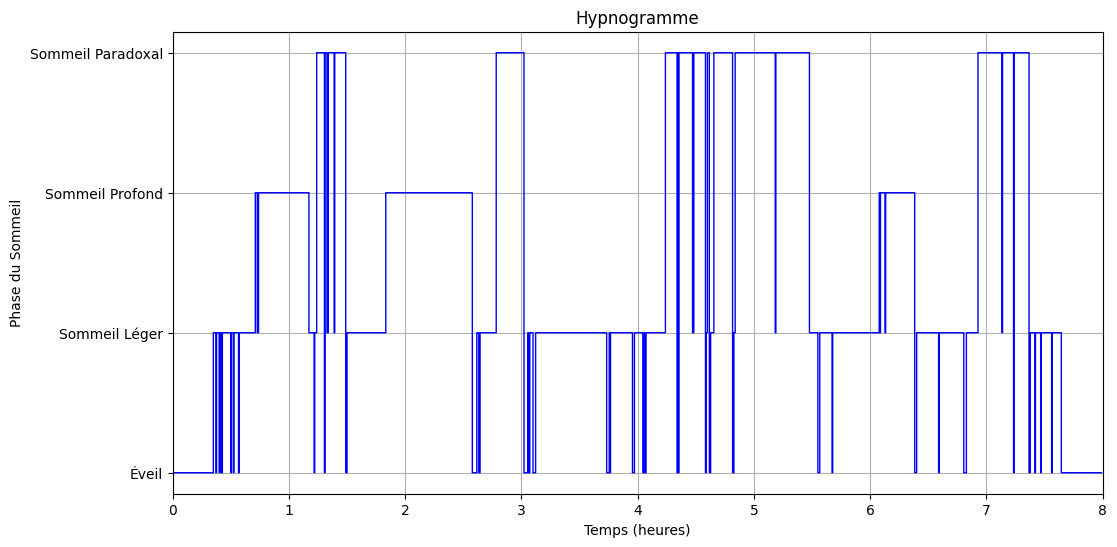

In [6]:
#%% Graphique Hypnogramme

# Définir les étiquettes pour les phases de sommeil
phase_labels = {
    0: 'Éveil',
    2: 'Sommeil Léger',
    4: 'Sommeil Profond',
    5: 'Sommeil Paradoxal'
}

# Mapper les phases numériques aux étiquettes et nomme, p quand inconnu
phases_labels = [phase_labels.get(p, 'Inconnu') for p in phases]

# Changer le temps de secondes pour heures
# Chaque ligne correspond à une fenêtre de 20 secondes. Début, Stop et Step
temps = np.arange(0, len(x) * 20, 20)/3600

# Créer un graphique
plt.figure(figsize=(12, 6))
plt.step(temps, phases_labels, where='post', color='b', linewidth=1)

# Ajouter des labels et un titre
plt.yticks(ticks=list(phase_labels.values()), labels=list(phase_labels.values()))
plt.xlabel('Temps (heures)')
plt.ylabel('Phase du Sommeil')
plt.title('Hypnogramme')
# Limiter l'axe des x de 0 à 8 heures
plt.xlim(0, 8)
plt.grid()
plt.show()

# Analyse ADL

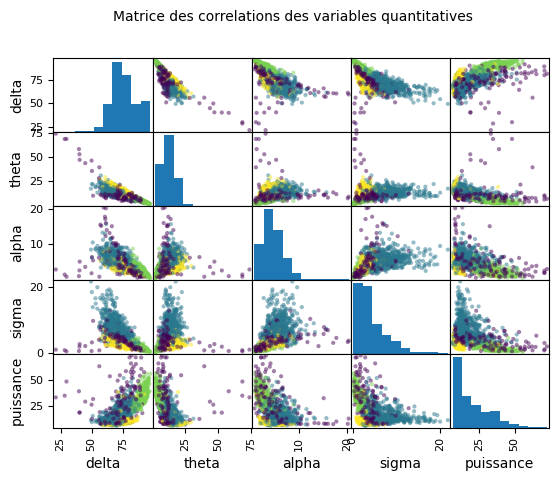

In [7]:
# Initialiser le modèle LDA pour projeter les données
lda = LinearDiscriminantAnalysis()

# Matrice de dispersion pour visualiser les corrélations entre les variables quantitatives
pd.plotting.scatter_matrix(puissances.drop(['phase'], axis = 1), c=puissances['phase'])
'''
    La première partie suprime la colonne "phase", car elle est le résultat et pas une variable
    La deuxième partie permet de colorer les points
    Ici, chaque graphique montre la relation entre deux variables à la fois

    Interpretation de la corrélation:
        Positive(de bas à gauche vers haut à droite): lorsque l'une des variables augmente, l'autre tend à augmenter également
        Négative(les points descend de gauche à droite): lorsque l'une augmente, l'autre diminue
        Pas de corrélation: aléatoire
'''

# Récuperer la figure pour la modifier, titre et la montre
fig = plt.gcf()
fig.suptitle('Matrice des correlations des variables quantitatives', fontsize=10)
plt.show()

#Divisé les donnés parmi deux dimensions X et Y et faire la validation avec les 420 premières points
X = x.iloc[:,[0,1,2,3,5]]
y = x.iloc[:, 6]

X_train = X.iloc[:420]
y_train = y.iloc[:420]

X_test = X.iloc[420:]
y_test = y.iloc[420:]

#Standardisation des données - Assurer que toutes les caractéristiques ont la même échelle
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Transformer les données
X_lda = lda.fit_transform(X, y)

In [8]:
X_test

,delta,theta,alpha,sigma,puissance
420,91.556287,3.934814,3.488437,0.784098,31.752536
421,92.755082,3.348731,2.213808,1.437850,28.949248
422,94.942399,2.845519,1.614215,0.449560,42.704210
423,94.779570,3.364571,1.143455,0.571355,36.639960
424,94.660054,2.670994,1.293887,1.218809,41.349023
...,...,...,...,...,...
1434,61.395942,8.428112,16.009647,6.834782,8.003776
1435,69.677840,8.474296,10.398282,5.530732,7.842957
1436,57.022905,11.729914,15.545942,6.983498,7.910851
1437,83.681835,8.253927,3.866572,1.869856,62.202080


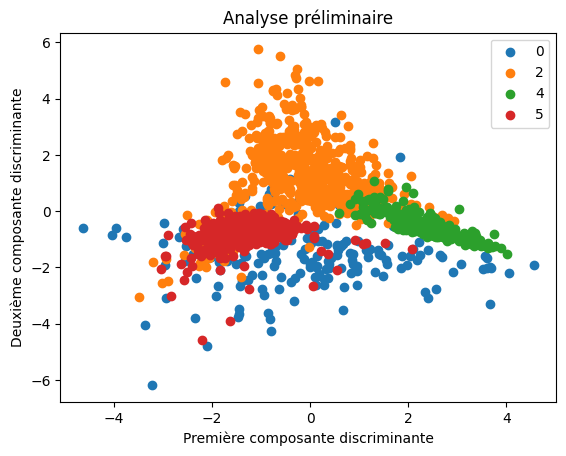

In [9]:
#%% Représentation dans le plan des 2 vecteurs discriminants
#Créer la figure
plt.figure()

#Boucle les phases de sommeil
'''
    On va parcurir chaque phase
    Pour chaque phase, on sélectionne les échantillons qui correspondent à cette phase
    Ils sont visualiser avec plt.scatter, 0 = première composante et 1 = deuxième composante
'''
for label in np.unique(puissances['phase']):
    plt.scatter(X_lda[puissances['phase'] == label][:, 0],
                X_lda[puissances['phase'] == label][:, 1],
                label=label)
plt.xlabel('Première composante discriminante')
plt.ylabel('Deuxième composante discriminante')
plt.title('Analyse préliminaire')
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.show()

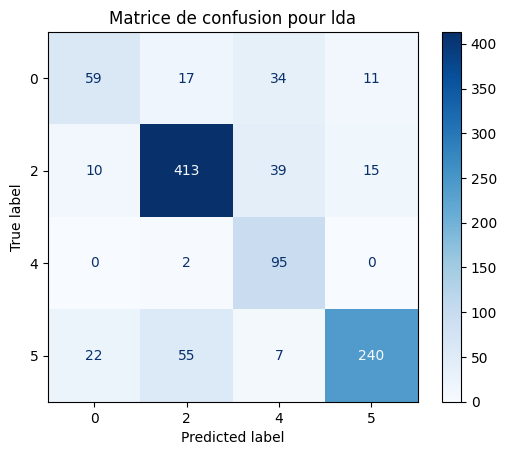

Number of mislabeled points out of a total 1019 points : 212
accuracy pour lda :  0.7920
accuracy équilibrée (Balanced Accuracy) pour lda : 0.7684


In [10]:
#%% Classifieur Lineaire
lda = LinearDiscriminantAnalysis()
#Entraîner les modèles avec la fonction fit
lda.fit(X_train_scaled, y_train)

# Prédictions sur les données de test
y_pred_lda = lda.predict(X_test_scaled)

# Création de la matrice de confusion
cm_lda = confusion_matrix(y_test, y_pred_lda)

# Plot la matrice de confusion
labels = ['0', '2', '4','5']
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lda, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour lda')
plt.show()

# Nombre de points mal classés
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred_lda).sum()))

#Faire l'analyse de la accuracy
accuracy_lda = accuracy_score(y_test, y_pred_lda)
balanced_accuracy_lda = balanced_accuracy_score(y_test, y_pred_lda)
# Affichage des accuracys
print(f"accuracy pour lda : {accuracy_lda: .4f}")
print(f"accuracy équilibrée (Balanced Accuracy) pour lda : {balanced_accuracy_lda:.4f}")

# Affichage du rapport de classification (accuracy, rappel, F1-score)
#print(classification_report(y_test, y_pred_lda, target_names=labels)

/home/andre/miniconda3/envs/vision2/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


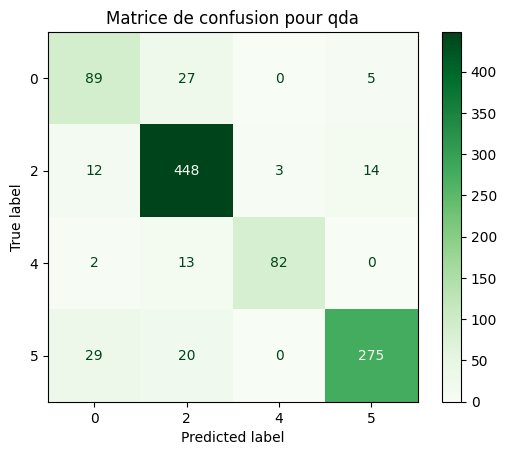

Number of mislabeled points out of a total 1019 points : 125
accuracy pour qda :  0.8773
accuracy équilibrée (Balanced Accuracy) pour qda : 0.8422


In [11]:
#%% Classifieur Quadratic
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)
y_pred_qda = qda.predict(X_test_scaled)
cm_qda = confusion_matrix(y_test, y_pred_qda)

disp_qda = ConfusionMatrixDisplay(confusion_matrix=cm_qda, display_labels=labels)
disp_qda.plot(cmap=plt.cm.Greens)
plt.title('Matrice de confusion pour qda')
plt.show()


print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred_qda).sum()))

accuracy_qda = accuracy_score(y_test, y_pred_qda)
balanced_accuracy_qda = balanced_accuracy_score(y_test, y_pred_qda)

# Affichage des accuracys
print(f"accuracy pour qda : {accuracy_qda: .4f}")
print(f"accuracy équilibrée (Balanced Accuracy) pour qda : {balanced_accuracy_qda:.4f}")

# Affichage du rapport de classification (accuracy, rappel, F1-score)
#print(classification_report(y_test, y_pred_qda, target_names=labels))

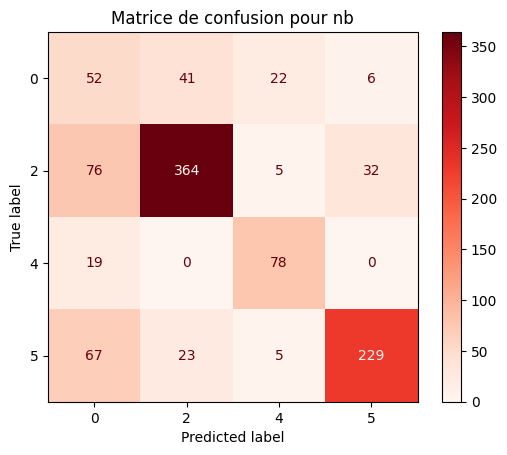

Number of mislabeled points out of a total 1019 points : 296
accuracy pour nb :  0.7095
accuracy équilibrée (Balanced Accuracy) pour nb : 0.6759


In [12]:
#%% Classifieur Bayes Naif
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
cm_nb = confusion_matrix(y_test, y_pred_nb)

disp_qda = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=labels)
disp_qda.plot(cmap=plt.cm.Reds)
plt.title('Matrice de confusion pour nb')
plt.show()


print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred_nb).sum()))

accuracy_nb = accuracy_score(y_test, y_pred_nb)
balanced_accuracy_nb = balanced_accuracy_score(y_test, y_pred_nb)

# Affichage des accuracys
print(f"accuracy pour nb : {accuracy_nb: .4f}")
print(f"accuracy équilibrée (Balanced Accuracy) pour nb : {balanced_accuracy_nb:.4f}")

# Affichage du rapport de classification (accuracy, rappel, F1-score)
#print(classification_report(y_test, y_pred_nb, target_names=labels))

# Introduire un coût de rejet en ambiguité et calculer la nouvelle matrice de confusion en ajoutant la nouvelle classe pour l’enregistrement « sujet2 ».

In [13]:
# Extrait les caractéristiques sans la colonne 'beta'
X_sujet2 = x1.drop(['phase', 'beta'], axis=1)
y_sujet2 = x1['phase']

X_train_sujet2 = X.iloc[:420]
y_train_sujet2 = y.iloc[:420]

X_test_sujet2 = X.iloc[420:]
y_test_sujet2 = y.iloc[420:]

# Standardisation des données
scaler = StandardScaler()
X_train_sujet2_scaled = scaler.fit_transform(X_train_sujet2)
X_test_sujet2_scaled = scaler.transform(X_test_sujet2)
pd.DataFrame(X_train_sujet2_scaled, columns=X_sujet2.columns)

,delta,theta,alpha,sigma,puissance
0,0.145334,-0.900915,-0.290310,0.115637,0.429132
1,-0.377526,-0.008823,-0.851816,0.473229,0.046847
2,-0.050336,-0.035220,-0.730268,-0.098453,0.261150
3,-0.411692,-0.313191,-0.496302,0.619862,0.776387
4,-0.184197,-0.655420,-0.613101,0.155804,0.274439
...,...,...,...,...,...
415,1.244432,-1.185750,-1.180925,-0.572687,0.718878
416,1.264734,-1.096778,-1.125186,-0.863085,1.813778
417,1.121832,-1.070048,-0.682812,-0.807784,0.267467
418,1.303837,-1.241507,-0.950895,-0.914306,1.506813


## Introduire un coût de rejet basé sur l’ambiguïté

In [14]:
def evaluate_with_rejection(model, X, y, threshold=0.6):

    reject_symbol = -1

    # Obtenir les probabilités des prédictions
    y_proba = model.predict_proba(X)
    y_pred = model.predict(X)

    # Initialisation du tableau avec les prédictions, introduisant la classe "Rejet"
    y_pred_with_reject = np.full_like(y_pred, fill_value=reject_symbol, dtype=np.int64)

    for i in range(len(y_proba)):
        max_proba = np.max(y_proba[i])
        if max_proba >= threshold:
            y_pred_with_reject[i] = y_pred[i]  # Conserver la prédiction si confiance suffisante

    # Calculer la nouvelle matrice de confusion avec la classe 'Rejet'
    classes = np.append(np.unique(y), reject_symbol)
    confusion_matrix_with_reject = confusion_matrix(y, y_pred_with_reject, labels=classes)

    # Calcul de la accuracy en excluant les rejets
    accuracy_with_reject = accuracy_score(
        y[y_pred_with_reject != reject_symbol],
        y_pred_with_reject[y_pred_with_reject != reject_symbol]
    )

    ba_acc_with_reject = balanced_accuracy_score(
        y[y_pred_with_reject != reject_symbol],
        y_pred_with_reject[y_pred_with_reject != reject_symbol]
    )

    return accuracy_with_reject, ba_acc_with_reject, confusion_matrix_with_reject

threshold = 0.75

### Application pour LDA

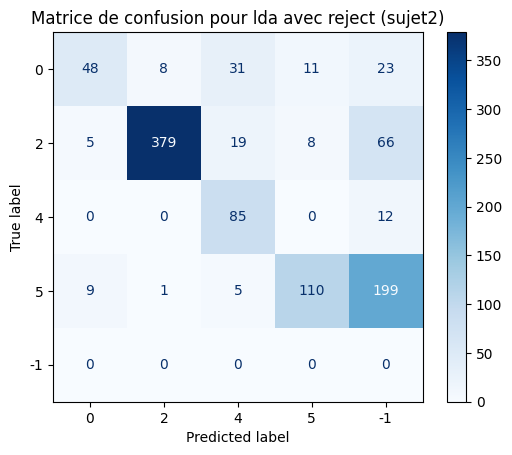

Accuracy avec rejet pour LDA (sujet2) : 0.8651
Balanced Accuracy avec rejet pour LDA (sujet2) : 0.8230


In [15]:
# Entraîner le modèle
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_sujet2_scaled, y_train_sujet2)

# Appliquer la fonction de rejet sur les données du "sujet2" et Evaluate
lda_accuracy_with_reject, lda_ba_acc_with_reject, cm_lda_with_reject = evaluate_with_rejection(
    lda,
    X_test_sujet2_scaled,
    y_test_sujet2,
    threshold=threshold
)

labels = ['0', '2', '4','5', '-1']
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lda_with_reject, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour lda avec reject (sujet2)')
plt.show()

# Affichage des résultats
print(f"Accuracy avec rejet pour LDA (sujet2) : {lda_accuracy_with_reject:.4f}")
print(f"Balanced Accuracy avec rejet pour LDA (sujet2) : {lda_ba_acc_with_reject:.4f}")

### Application pour QDA

/home/andre/miniconda3/envs/vision2/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 2 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


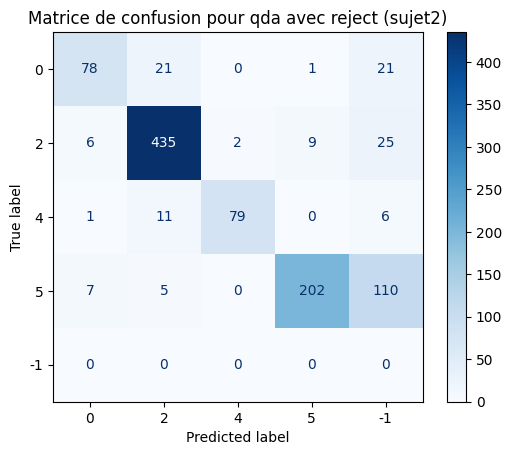

accuracy avec rejet pour QDA (sujet2) : 0.9265
Balanced Accuracy avec rejet pour QDA (sujet2) : 0.8886


In [16]:
# Entraîner le modèle
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_train_sujet2_scaled, y_train_sujet2)

# Appliquer la fonction de rejet sur les données du "sujet2"
qda_accuracy_with_reject, qda_ba_acc_with_reject, cm_qda_with_reject = evaluate_with_rejection(
    qda,
    X_test_sujet2_scaled,
    y_test_sujet2,
    threshold
)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_qda_with_reject, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour qda avec reject (sujet2)')
plt.show()


# Affichage des résultats
print(f"accuracy avec rejet pour QDA (sujet2) : {qda_accuracy_with_reject:.4f}")
print(f"Balanced Accuracy avec rejet pour QDA (sujet2) : {qda_ba_acc_with_reject:.4f}")

### Application pour Naive Bayes

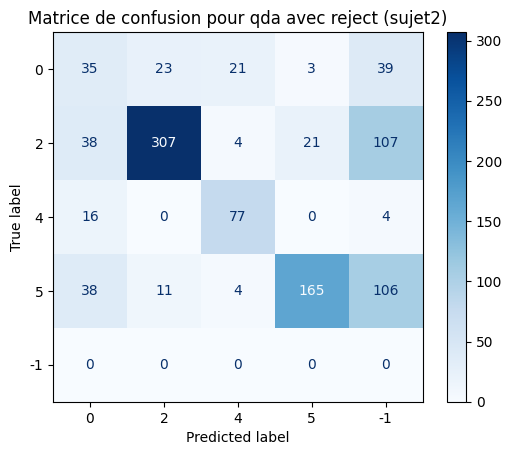

accuracy avec rejet pour Naive Bayes (sujet2) : 0.7654
Balanced Accuracy avec rejet pour Naive Bayes (sujet2) : 0.7103


In [17]:
# Entraîner le modèle
nb = GaussianNB()
nb.fit(X_train_sujet2_scaled, y_train_sujet2)

# Appliquer la fonction de rejet sur les données du "sujet2"
nb_accuracy_with_reject, nb_ba_acc_with_reject, cm_nb_with_reject = evaluate_with_rejection(
    nb,
    X_test_sujet2_scaled,
    y_test_sujet2,
    threshold
)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb_with_reject, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de confusion pour qda avec reject (sujet2)')
plt.show()

# Affichage des résultats
print(f"accuracy avec rejet pour Naive Bayes (sujet2) : {nb_accuracy_with_reject:.4f}")
print(f"Balanced Accuracy avec rejet pour Naive Bayes (sujet2) : {nb_ba_acc_with_reject:.4f}")

## Resumé dans un tableau

In [18]:
tableau = {
    'Sans ambiguïté': [balanced_accuracy_lda, balanced_accuracy_qda, balanced_accuracy_nb],
    'Avec Ambiguïté': [lda_ba_acc_with_reject, qda_ba_acc_with_reject, nb_ba_acc_with_reject]
}
index_names = ['LDA', 'QDA', 'NB']

# Création du DataFrame
tb = pd.DataFrame(tableau, index=index_names)

# Affichage du DataFrame
tb

,Sans ambiguïté,Avec Ambiguïté
LDA,0.768388,0.822984
QDA,0.842217,0.888612
NB,0.675942,0.710349


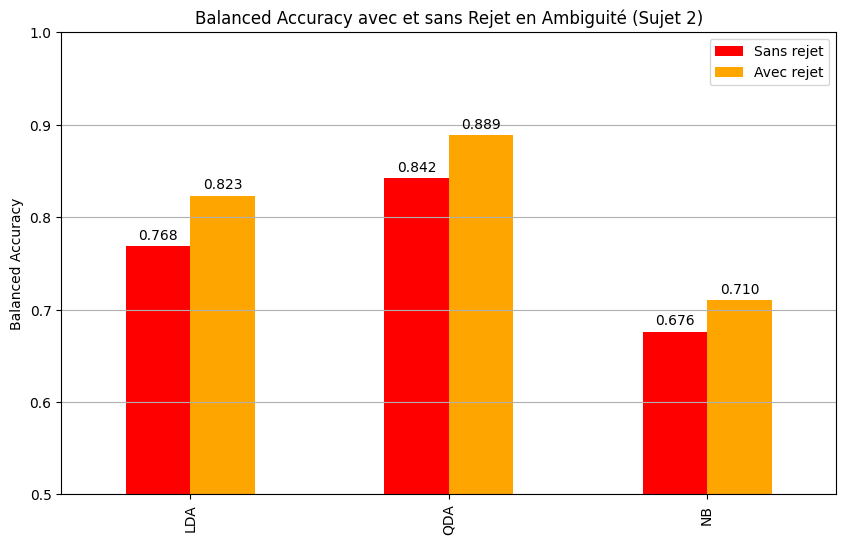

In [19]:
#%% Grafique pour les Balanced Acurracy sans et avec rejet
tableau = {
    'Sans rejet': [balanced_accuracy_lda, balanced_accuracy_qda, balanced_accuracy_nb],
    'Avec rejet': [lda_ba_acc_with_reject, qda_ba_acc_with_reject, nb_ba_acc_with_reject]
}
index_names = ['LDA', 'QDA', 'NB']

# Création du DataFrame
tb = pd.DataFrame(tableau, index=index_names)

ax = tb.plot(kind='bar', figsize=(10, 6), color=['red', 'orange'], capsize=4)

# Ajouter des labels et un titre
plt.title('Balanced Accuracy avec et sans Rejet en Ambiguité (Sujet 2)')
plt.ylabel('Balanced Accuracy')
plt.ylim(0.5, 1.0)  # Ajustez les limites si nécessaire
plt.grid(True, axis='y')

# Afficher les valeurs sur les barres
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', xytext=(0, 5), textcoords='offset points')

# Afficher le graphique
plt.show()

## Validation Croisée

In [29]:
# Combinez les données de tous les sujets dans une seule DataFrame
data = pd.concat([x1, x2, x3], axis=0)  # Ajoutez d'autres sujets ici
X = data.iloc[:, :-1]  # Toutes les colonnes sauf la dernière (caractéristiques)
y = data.iloc[:, -1]   # La dernière colonne (cible)

# Initialisation des classifieurs
classifiers = {
    "LDA": LinearDiscriminantAnalysis(),
    "QDA": QuadraticDiscriminantAnalysis(reg_param=0.1),
    "NB": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=6)
}

# Initialisation des résultats
results = {}

# KFold pour la validation croisée inter-sujet
kf = KFold(n_splits=3)

for classifier_name, classifier in classifiers.items():
    accuracies = []
    for train_index, test_index in kf.split(X):
        # Séparation des ensembles d'entraînement et de test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Entraînement du classifieur
        classifier.fit(X_train_scaled, y_train)

        # Prédictions sur l'ensemble de test
        y_pred = classifier.predict(X_test_scaled)

        # Calcul de l'accuracy
        balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
        accuracies.append(balanced_accuracy)

        # Matrice de confusion
        cm = confusion_matrix(y_test, y_pred)

    # Calcul de l'accuracy moyenne
    mean_accuracy = np.mean(accuracies)
    results[classifier_name] = mean_accuracy

In [30]:
# Affichage des résultats globaux
print("Performances inter-sujet des classifieurs:")
for classifier, accuracy in results.items():
    print(f"{classifier}: {accuracy:.4f}")

Performances inter-sujet des classifieurs:
LDA: 0.6799
QDA: 0.7340
NB: 0.6191
KNN: 0.7177
